<a href="https://colab.research.google.com/github/RMKEC111722203119/Machine-learning/blob/main/Max_Loan_amount_prediction/Calculating_credit_worthiness_for_rural_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing

In [5]:
import pandas as pd
import numpy as np

In [6]:
data= pd.read_csv('/content/Calculating credit worthiness for rural India.csv')

In [7]:
data.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     40000 non-null  int64  
 1   city                   38136 non-null  object 
 2   age                    40000 non-null  int64  
 3   sex                    40000 non-null  object 
 4   social_class           34745 non-null  object 
 5   primary_business       39974 non-null  object 
 6   secondary_business     34759 non-null  object 
 7   annual_income          40000 non-null  float64
 8   monthly_expenses       39880 non-null  float64
 9   old_dependents         40000 non-null  int64  
 10  young_dependents       40000 non-null  int64  
 11  home_ownership         39621 non-null  float64
 12  type_of_house          39306 non-null  object 
 13  occupants_count        40000 non-null  int64  
 14  house_area             40000 non-null  float64
 15  sa

In [9]:
data.isnull().sum()

Id                          0
city                     1864
age                         0
sex                         0
social_class             5255
primary_business           26
secondary_business       5241
annual_income               0
monthly_expenses          120
old_dependents              0
young_dependents            0
home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
print(data.columns)

Index(['Id', 'city', 'age', 'sex', 'social_class', 'primary_business',
       'secondary_business', 'annual_income', 'monthly_expenses',
       'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house',
       'occupants_count', 'house_area', 'sanitary_availability',
       'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments',
       'loan_amount'],
      dtype='object')


In [12]:
data=data.dropna()


In [13]:
data.isnull().sum()

Id                       0
city                     0
age                      0
sex                      0
social_class             0
primary_business         0
secondary_business       0
annual_income            0
monthly_expenses         0
old_dependents           0
young_dependents         0
home_ownership           0
type_of_house            0
occupants_count          0
house_area               0
sanitary_availability    0
water_availabity         0
loan_purpose             0
loan_tenure              0
loan_installments        0
loan_amount              0
dtype: int64

In [14]:
data.select_dtypes(include=['float64', 'int64']).corr()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
Id,1.000000,0.032430,0.382450,-0.030754,0.016603,-0.024592,0.080969,0.007402,0.023110,-0.212740,0.437279,-0.046052,-0.230085,0.137049
age,0.032430,1.000000,0.063119,-0.020966,0.143027,-0.280418,0.028310,-0.001220,0.005442,-0.034900,-0.006657,-0.031726,-0.039416,0.008306
annual_income,0.382450,0.063119,1.000000,0.113247,0.026413,0.037893,-0.027553,0.003458,0.012742,-0.071958,0.290173,-0.007098,-0.129596,0.055908
monthly_expenses,-0.030754,-0.020966,0.113247,1.000000,-0.005147,0.016335,-0.050665,0.001274,-0.009497,0.048427,0.082031,-0.011043,0.117621,0.019580
old_dependents,0.016603,0.143027,0.026413,-0.005147,1.000000,-0.139646,0.001536,-0.001175,0.007035,-0.012149,-0.021304,-0.021055,-0.031904,0.001701
young_dependents,-0.024592,-0.280418,0.037893,0.016335,-0.139646,1.000000,-0.010708,0.003657,-0.000653,-0.011119,-0.021612,0.018426,-0.063835,-0.032622
home_ownership,0.080969,0.028310,-0.027553,-0.050665,0.001536,-0.010708,1.000000,0.000830,0.006619,0.003530,0.014161,-0.000694,0.051491,0.011041
occupants_count,0.007402,-0.001220,0.003458,0.001274,-0.001175,0.003657,0.000830,1.000000,-0.000361,0.002791,0.005368,0.000077,-0.003175,-0.000352
house_area,0.023110,0.005442,0.012742,-0.009497,0.007035,-0.000653,0.006619,-0.000361,1.000000,0.020345,0.000540,0.005266,-0.027008,-0.001094
sanitary_availability,-0.212740,-0.034900,-0.071958,0.048427,-0.012149,-0.011119,0.003530,0.002791,0.020345,1.000000,0.148218,0.059547,0.255817,-0.007471


In [15]:
nums= data.select_dtypes(include=['float64', 'int64']).columns
len(nums)

14

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

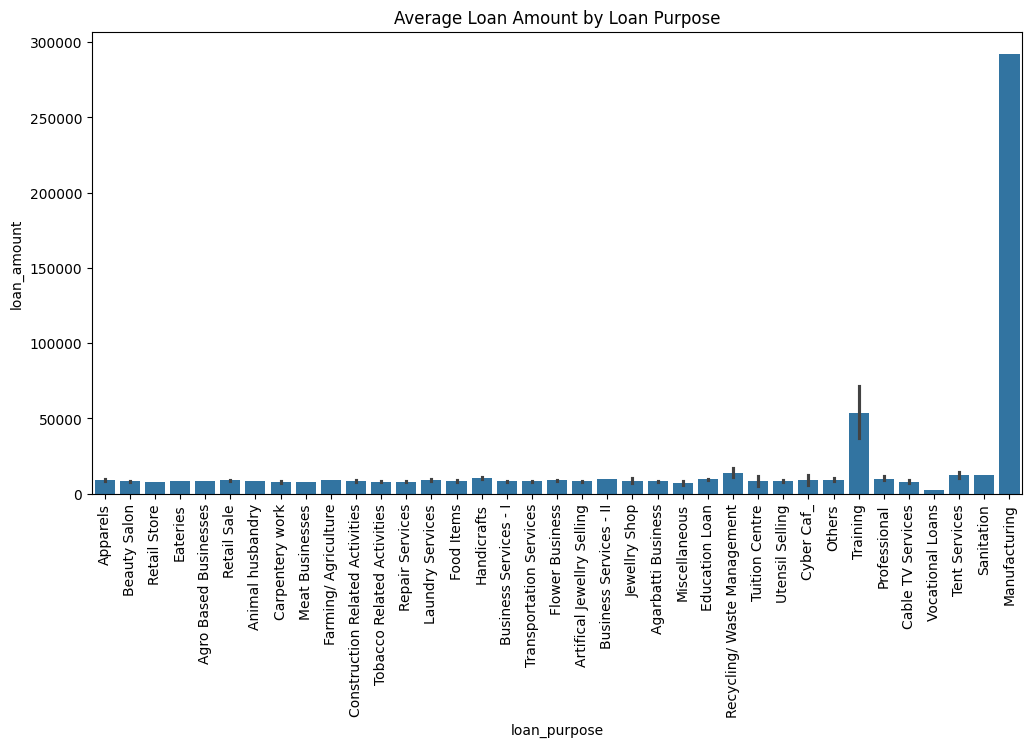

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_purpose', y='loan_amount', data=data, estimator=lambda x: x.mean())
plt.title('Average Loan Amount by Loan Purpose')
plt.xticks(rotation=90)
plt.show()

# Machine Learning

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [19]:
X = data.drop(columns=['loan_amount', 'Id'])
y = data['loan_amount']

In [20]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded

,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,...,loan_purpose_Retail Sale,loan_purpose_Retail Store,loan_purpose_Sanitation,loan_purpose_Tent Services,loan_purpose_Tobacco Related Activities,loan_purpose_Training,loan_purpose_Transportation Services,loan_purpose_Tuition Centre,loan_purpose_Utensil Selling,loan_purpose_Vocational Loans
0,22,36000.0,5000.0,0,2,1.0,4,70.0,1.0,0.5,...,False,False,False,False,False,False,False,False,False,False
1,21,94000.0,3600.0,1,1,1.0,4,80.0,1.0,0.5,...,False,False,False,False,False,False,False,False,False,False
2,24,48000.0,4000.0,0,2,1.0,4,50.0,1.0,0.5,...,False,False,False,False,False,False,False,False,False,False
4,23,36000.0,3500.0,0,0,1.0,1,112.0,1.0,0.5,...,False,True,False,False,False,False,False,False,False,False
5,23,36000.0,3500.0,0,0,1.0,1,112.0,1.0,0.5,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,45,78000.0,4000.0,0,0,1.0,2,600.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
39996,35,48000.0,4000.0,0,3,1.0,4,800.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
39997,35,48000.0,3500.0,0,2,1.0,3,600.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
39998,28,48000.0,4000.0,0,3,1.0,4,600.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
}

In [24]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled if name in ['Support Vector Regressor'] else X_train, y_train)
    y_pred = model.predict(X_test_scaled if name in ['Support Vector Regressor'] else X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def preprocess_new_data(new_data, feature_columns, scaler=None):
    new_data_df = pd.DataFrame([new_data])
    new_data_encoded = pd.get_dummies(new_data_df)
    for col in feature_columns:
        if col not in new_data_encoded.columns:
            new_data_encoded[col] = 0

    new_data_encoded = new_data_encoded[feature_columns]

    if scaler:
        new_data_scaled = scaler.transform(new_data_encoded)
        return new_data_scaled

    return new_data_encoded

# Function to predict loan amount
def predict_loan_amount(model, new_customer_data, feature_columns, scaler=None):
    new_data_preprocessed = preprocess_new_data(new_customer_data, feature_columns, scaler)
    predicted_loan_amount = model.predict(new_data_preprocessed)
    return predicted_loan_amount[0]



In [35]:
new_customer = {
    'city': 'rural_city',
    'age': 35,
    'sex': 'male',
    'social_class': 'middle',
    'primary_business': 'farming',
    'secondary_business': 'none',
    'annual_income': 50000,
    'monthly_expenses': 3000,
    'old_dependents': 2,
    'young_dependents': 1,
    'home_ownership': 'owned',
    'type_of_house': 'pucca',
    'occupants_count': 4,
    'house_area': 1200,
    'sanitary_availability': 'yes',
    'water_availability': 'yes',
    'loan_purpose': 'agriculture',
    'loan_tenure': 24,
    'loan_installments': 12
}

trained_model = models['Linear Regression']
feature_columns = X_encoded.columns.tolist()
scaler = None


predicted_amount = predict_loan_amount(trained_model, new_customer, feature_columns, scaler)

<ipython-input-32-1965202abc54>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data_encoded[col] = 0
<ipython-input-32-1965202abc54>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data_encoded[col] = 0
<ipython-input-32-1965202abc54>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_da

# Solution

**•	Do a descriptive analysis of all the variables**

In [25]:
data.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,33065.000000,33065.000000,3.306500e+04,33065.000000,33065.000000,33065.000000,33065.000000,33065.000000,33065.000000,33065.000000,33065.000000,33065.000000,33065.000000,33065.000000
mean,21299.550280,35.967730,4.327323e+04,3871.016392,0.050204,1.317314,0.977862,32.044609,631.846666,0.800363,0.752125,11.983457,21.835385,8765.625284
std,11659.581749,8.861007,2.648953e+04,4939.454460,0.234143,1.050542,0.147135,5224.427695,5049.283730,0.399809,0.254818,1.218034,16.748668,11724.169772
min,1.000000,18.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,3.000000,0.000000,100.000000
25%,13822.000000,29.000000,2.400000e+04,2700.000000,0.000000,0.000000,1.000000,2.000000,300.000000,1.000000,0.500000,12.000000,12.000000,5000.000000
50%,22342.000000,35.000000,4.800000e+04,3500.000000,0.000000,1.000000,1.000000,3.000000,450.000000,1.000000,1.000000,12.000000,12.000000,8000.000000
75%,31137.000000,42.000000,6.000000e+04,4000.000000,0.000000,2.000000,1.000000,4.000000,650.000000,1.000000,1.000000,12.000000,50.000000,10000.000000
max,40000.000000,88.000000,1.200000e+06,240000.000000,3.000000,7.000000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1000000.000000


**•	There is a new customer who needs a loan. Which models will be best suited to predict the loan_amount that can be granted to the customer?**

In [26]:
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']}, R2 = {metrics['R2']}")

Linear Regression: MSE = 81574714.04383661, R2 = 0.6343863446092557
Random Forest: MSE = 63028588.63401264, R2 = 0.7175091208751594
Gradient Boosting: MSE = 65523490.42208717, R2 = 0.7063270999110571
Support Vector Regressor: MSE = 223792453.41069227, R2 = -0.003026218349680976


•	Build a model to predict the maximum loan_amount that can be granted to the customer. Which all variables are good predictors?

In [36]:
print(f"Predicted Loan Amount: {predicted_amount}")


Predicted Loan Amount: 15913.601741934708


In [27]:
#The features with the highest importance scores in Random Forest and Boosting are considered good predictors.

In [30]:
important_features = {}

# Random Forest Feature Importance
rf_model = models['Random Forest']
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
important_features['Random Forest'] = rf_importance

# XGBoost Feature Importance
xgb_model = models['Gradient Boosting']
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
important_features['Gradient Boosting'] = xgb_importance

print("\nTop 10 Important Features for Random Forest:")
print(rf_importance.head(10))

print("\nTop 10 Important Features for XGBoost:")
print(xgb_importance.head(10))


Top 10 Important Features for Random Forest:
social_class_Traditional Weaving    0.654381
city_BAHADARPUR                     0.080301
occupants_count                     0.037060
city_Shimoga                        0.030035
city_Hubli                          0.025409
annual_income                       0.012343
house_area                          0.011246
monthly_expenses                    0.010742
water_availabity                    0.009682
age                                 0.009013
dtype: float64

Top 10 Important Features for XGBoost:
social_class_Traditional Weaving    0.723181
city_BAHADARPUR                     0.081199
occupants_count                     0.078289
city_Hubli                          0.020904
loan_tenure                         0.014375
loan_purpose_Manufacturing          0.010678
city_Jalgaon                        0.010021
water_availabity                    0.008095
monthly_expenses                    0.007182
annual_income                       0.006369

**•	Is loan_purpose a significant predictor? The business has insisted on using loan_purpose as a predictor. If it is not already a significant contributor, can we still modify the model to include it?**

In [40]:
importances = rf_model.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importances:")
print(feature_importances)


Random Forest Feature Importances:
social_class_Traditional Weaving       0.654381
city_BAHADARPUR                        0.080301
occupants_count                        0.037060
city_Shimoga                           0.030035
city_Hubli                             0.025409
                                         ...   
city_Perur                             0.000000
city_Batagaon                          0.000000
primary_business_FUNNEL TOOL MAKING    0.000000
social_class_S.S                       0.000000
social_class_Dushad                    0.000000
Length: 1492, dtype: float64


In [39]:
loan_purpose_importance = feature_importances[feature_importances.index.str.contains('loan_purpose')]
print("\nLoan Purpose Feature Importances:")
print(loan_purpose_importance)



Loan Purpose Feature Importances:
loan_purpose_Manufacturing                      6.752450e-03
loan_purpose_Education Loan                     1.187149e-03
loan_purpose_Apparels                           1.048962e-03
loan_purpose_Construction Related Activities    5.483708e-04
loan_purpose_Farming/ Agriculture               2.498615e-04
loan_purpose_Agro Based Businesses              2.475462e-04
loan_purpose_Sanitation                         2.338586e-04
loan_purpose_Handicrafts                        2.294201e-04
loan_purpose_Animal husbandry                   1.926101e-04
loan_purpose_Meat Businesses                    1.839461e-04
loan_purpose_Recycling/ Waste Management        1.421599e-04
loan_purpose_Eateries                           1.342805e-04
loan_purpose_Retail Store                       1.292677e-04
loan_purpose_Training                           1.231202e-04
loan_purpose_Vocational Loans                   1.153571e-04
loan_purpose_Tobacco Related Activities         8.

**•	How will you measure the fitness of the model? Which metrics (accuracy, recall, etc.) are most relevant?**

In [41]:
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']}, R2 = {metrics['R2']}")

Linear Regression: MSE = 81574714.04383661, R2 = 0.6343863446092557
Random Forest: MSE = 63028588.63401264, R2 = 0.7175091208751594
Gradient Boosting: MSE = 65523490.42208717, R2 = 0.7063270999110571
Support Vector Regressor: MSE = 223792453.41069227, R2 = -0.003026218349680976
